<a href="https://colab.research.google.com/github/C0RD3LL/Omics/blob/main/Geneomics/DNAseq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this notebook is to go over basic commands that are used for simple genomic task. Packages from BiocManager are used heavily. Material is inspired by Pine Bio's omicslogics geneomics course.

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install(c(("DECIPHER"),("Biostrings")))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'DECIPHER', 'Biostrings'

also installing the dependencies ‘bitops’, ‘plogr’, ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘RSQLite’, ‘S4Vectors’, ‘IRanges’, ‘XVector’, ‘BiocGenerics’, ‘GenomeInfoDb’


Old packages: 'broom', 'cpp11', 'gert', 'glue', 'openssl', 'sessioninfo',
  'tibble', 'tinytex', 'uuid', 'xfun', 'nlme'



In [ ]:
install.packages(c(("ape"),("ade4")))
#

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
also installing the dependencies ‘pixmap’, ‘sp’




In [ ]:
suppressMessages(library(DECIPHER))
suppressMessages(library(Biostrings))
library(stats)
suppressMessages(library(ape))
suppressMessages(library(ade4))

In [ ]:
#Load sequence as DNA string 
DNA <- "ATATATATCGCAATAGCAGTACCGACATACGACTAGATACATAGGGATAC"
#Convert DNA to RNA 
RNAstring <-chartr(old = "T", new = "U", DNAstring)
#Convert RNA to protein 
dna0 <- DNAString(DNA)
print(suppressWarnings(translate(dna0)))

16-letter AAString object
seq: IYIAIAVPTYD*IHRD


In [ ]:
#Pairwise Alignment 
DNAseq0 <- DNAString("CGACCATTTGTGAGGTACTGGAGCCGAGAGGTAACTACGATGCCGCTAAGAACCTCTC")
DNAseq1 <- DNAString("TATAATCGTTCGCTATTCAGGGATTGACCAACACCGGAAAACATCTCACTTGAAGTAAT")
DNAseq2 <- DNAString("AGGAGACGTCAGTCCAGATATCTTTGATGTCGTGATTGGAAGGACCCTTGGCCCTCCAC")
DNAseqf <- readDNAStringSet("https://raw.githubusercontent.com/pine-bio-support/DNA-sequences/main/sample.fna")
#f stands for fasta
align0 <- pairwiseAlignment(DNAseq0,DNAseq1)
print(align0)

# By defualt pairwiseAlignment is in type = global (aligns the whole sequence as 
# possible this introduces gaps into sequence to get the best fit.)
# type = local (looks to keep only parts of the seq that align)
# type = overlap ()

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: ------CGACCATTTGTGAGGTACTGGAGCCGAGAGGTAACTACGATGCCGCTAAGAACCTCTC
subject: TATAATCGTTCGCTATTCAGGGATTGACCAACACCGGAAA--AC-ATCTCACTT-GAAG-TAAT
score: -193.8741 


In [ ]:
#troubleshooting the pairwiseAlignment function...

align1 <- pairwiseAlignment(DNAseq0,DNAseq1, type = "local")
align2 <- pairwiseAlignment(DNAseq0,DNAseq2, type = "overlap")
align3 <- pairwiseAlignment(DNAseq0,DNAseq0)

print(align1)
print(align2)
print(align3)

Local PairwiseAlignmentsSingleSubject (1 of 1)
pattern: [44] CGCTA
subject: [11] CGCTA
score: 9.90878 
Overlap PairwiseAlignmentsSingleSubject (1 of 1)
pattern:  [1] C
subject: [59] C
score: 1.981756 
Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: CGACCATTTGTGAGGTACTGGAGCCGAGAGGTAACTACGATGCCGCTAAGAACCTCTC
subject: CGACCATTTGTGAGGTACTGGAGCCGAGAGGTAACTACGATGCCGCTAAGAACCTCTC
score: 114.9419 


In [ ]:
# Multi sequence alignment 
DNAseq <- list()
DNAseq[1] <- DNAseq0
DNAseq[2] <- DNAseq1
DNAseq[3] <- DNAseq2

seqs <- DNAStringSet(unlist(DNAseq))
MSA <- AlignSeqs(seqs)
print(MSA)

Warning message in `[<-`(`*tmp*`, 1, value = new("DNAString", shared = new("SharedRaw", :
“implicit list embedding of S4 objects is deprecated”
Warning message in `[<-`(`*tmp*`, 2, value = new("DNAString", shared = new("SharedRaw", :
“implicit list embedding of S4 objects is deprecated”
Warning message in `[<-`(`*tmp*`, 3, value = new("DNAString", shared = new("SharedRaw", :
“implicit list embedding of S4 objects is deprecated”


Determining distance matrix based on shared 7-mers:

Time difference of 0.01 secs

Clustering into groups by similarity:

Time difference of 0.01 secs

Aligning Sequences:

Time difference of 0.02 secs

Iteration 1 of 2:

Determining distance matrix based on alignment:

Time difference of 0.01 secs

Reclustering into groups by similarity:

Time difference of 0.01 secs

Realigning Sequences:

Time difference of 0.01 secs

Alignment converged - skipping remaining iteration.

Refining the alignment:

Time difference of 0.02 secs

DNAStringSet object of length 3:
    width seq
[1]    69 ----------CGACCA-TTTGTGAGGTACTGGAGCCGAGAGGTAACTACGATGCCGCTAAGAACCTCTC
[2]    69 ----TATAATCGTTCG-CTATTCAGGGATTGACCAACACCGGAAAACATCTCACTTGAAGTAAT-----
[3]    69 AGGAGACGTCAGTCCAGATATCTTTGATGTCGTGATTGGAAGGACCCTTGGCCCTCCAC----------


In [ ]:
#Reverse compliment
#Create reverse complement
rev <- reverseComplement(DNAseq0)

#Print Reverse complement
print(DNAseq0)
print(rev)

58-letter DNAString object
seq: CGACCATTTGTGAGGTACTGGAGCCGAGAGGTAACTACGATGCCGCTAAGAACCTCTC
58-letter DNAString object
seq: GAGAGGTTCTTAGCGGCATCGTAGTTACCTCTCGGCTCCAGTACCTCACAAATGGTCG


In [ ]:
revf <- reverseComplement(DNAseqf)
print(DNAseqf)
print(revf)

DNAStringSet object of length 1:
    width seq                                               names               
[1]    58 ATGCCGTGGTAAAGCCTTAAGAG...GCTGTACGSGCGCCCTTAACGAG Example_seq
DNAStringSet object of length 1:
    width seq                                               names               
[1]    58 CTCGTTAAGGGCGCSCGTACAGC...CTCTTAAGGCTTTACCACGGCAT Example_seq


Genomic variation in NGS Data

Generating a phylogenic tree

Once the data is loaded, we need to compute the distance among the sequences. The distance-based phylogenetic reconstruction consists of 2 steps: 
1. computing pairwise genetic distances between samples/sequences
2. representation of these distances using a tree,

In [ ]:
newdna <- read.dna(file = "https://code.omicslogic.com/resources/FD5Z", format = "fasta")
print(newdna)

40 DNA sequences in binary format stored in a matrix.

All sequences of same length: 1701 

Labels:
CY013200
CY013781
CY012128
CY013613
CY012160
CY012272
...

Base composition:
    a     c     g     t 
0.333 0.201 0.227 0.239 
(Total: 68.04 kb)


In [ ]:
# Generate a distance matrix from newdna
Dist <- dist.dna(newdna, model = "TN93")
#Here, "Dist" is an object of class dist which contains the distances between 
#every pair of sequences. Now that genetic distances between these sequences 
#have been computed, we can also visualize this information. 
#There are n(n − 1)/2 distances for n sequences; where, n is the number of sequences.

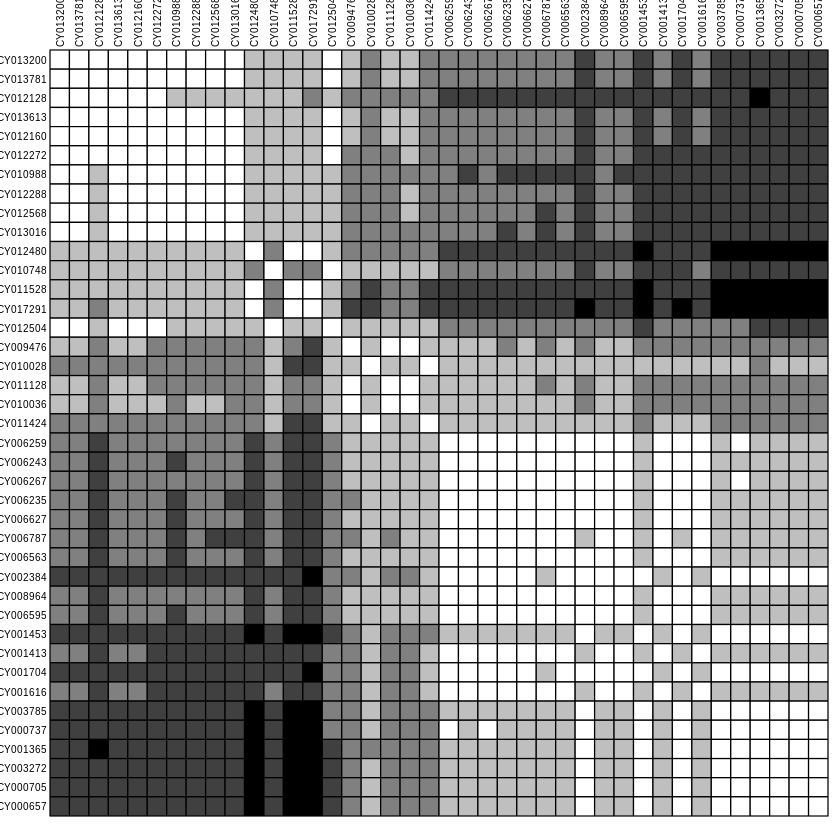

In [ ]:
#Simple Black and White
temp <- as.data.frame(as.matrix(Dist))
table.paint(temp, cleg = 0, clabel.row = 0.5, clabel.col = 0.5)

ERROR: ignored

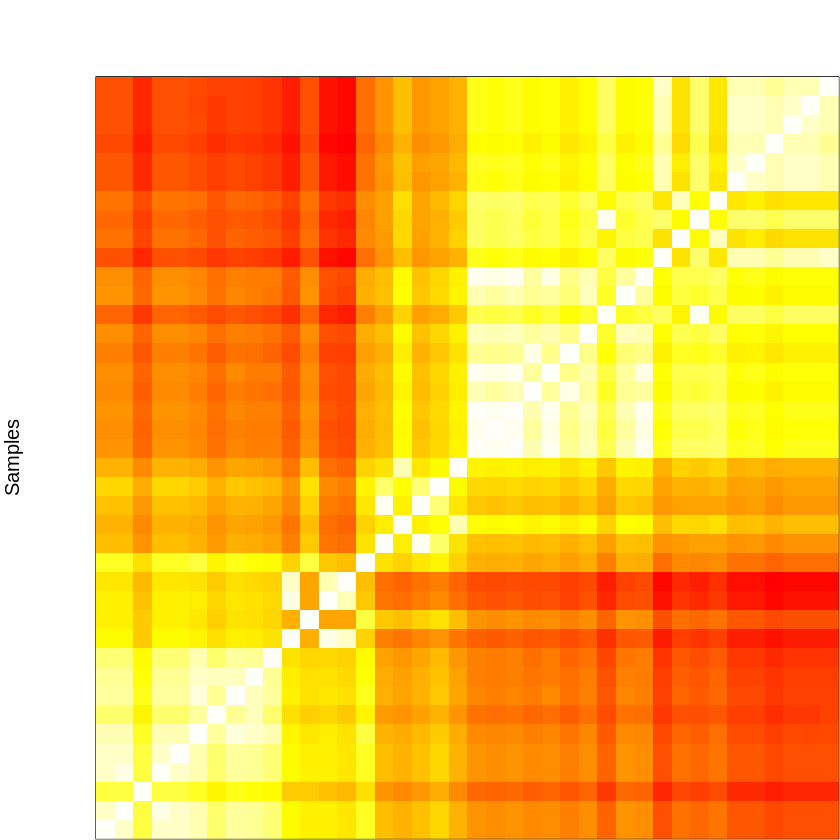

In [ ]:
#Heat map style 
# convert into matrix
temp1 <-as.matrix(Dist)
# Define position of plot
par(mar = c(0.05, 4, 3.2, 0.05))

# Plot Distance matrix in the form of colored heatmap
image(x = 1:40, y = 1:40,temp1, col = rev(heat.colors(100)), xaxt = "n", yaxt = "n", xlab = "Samples", ylab = "Samples")
axis(side = 2, at = 1:40, lab = rownames(dna), las = 2, cex.axis = 0.6)
axis(side = 3, at = 1:40, lab = rownames(dna), las = 3, cex.axis = 0.6)


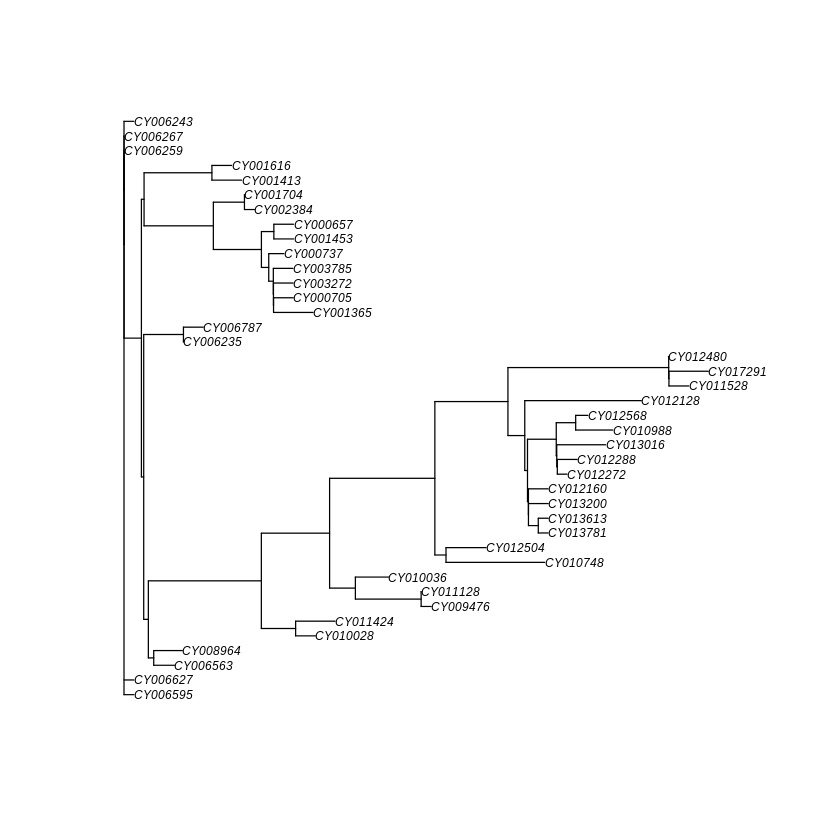

In [ ]:
 #Build phylogenetic tree using NJ method
tree1 <- nj(Dist)
# plot tree
plot(tree1, cex = 0.6)

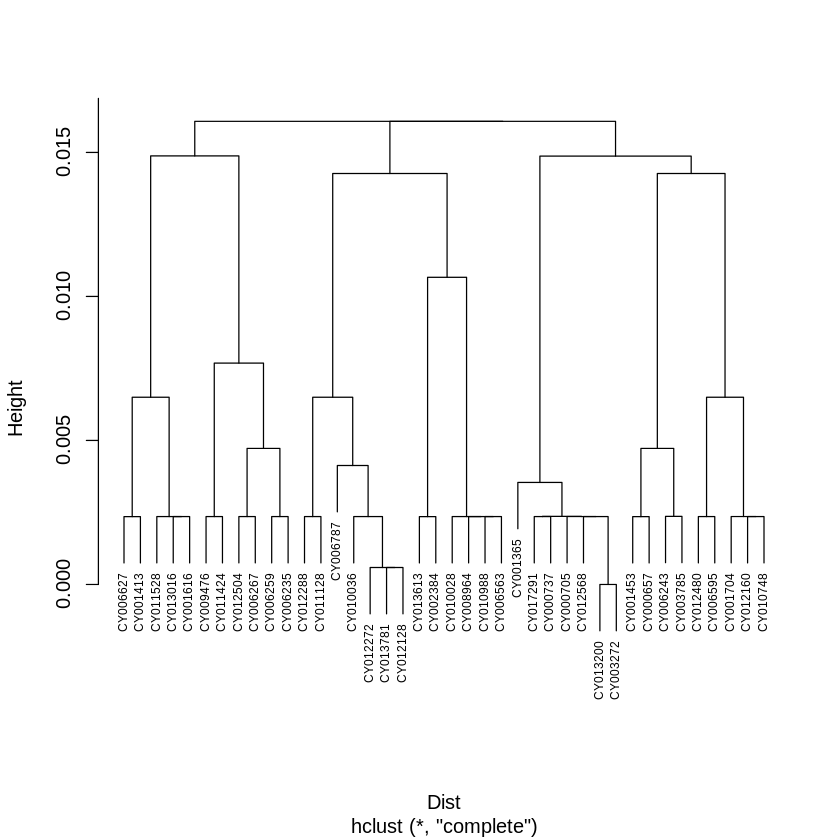

In [ ]:
# Build phylogenetic tree (dendrogram) using hclust method
tree2 <- hclust(Dist)
# plot
plot(tree2, labels = NULL, hang = 0.1, check = TRUE,cex=0.6, 
 axes = TRUE, frame.plot = FALSE, ann = TRUE, main = "", sub = NULL, xlab = NULL, ylab = "Height")